In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [24]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [25]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [26]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [27]:
#X_train = np.expand_dims(X_train, axis=-1) # <--- add batch axis
#y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

x_train, x_test = X_train.reshape(-1,28,28,1), X_test.reshape(-1,28,28,1)
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

Text(0.5, 0, '5')

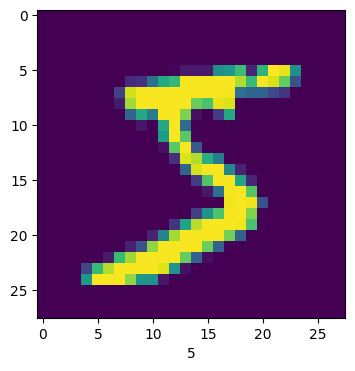

In [28]:
plt.figure(figsize=(7,4))
plt.imshow(X_train[0])
plt.xlabel(y_train[0])

Normalization

In [29]:
X_train = X_train/255
X_test = X_test/255

In [30]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28),),
    keras.layers.Dense(2000,activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 93s 49ms/step - loss: 0.1788 - accuracy: 0.9455
Epoch 2/5
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0732 - accuracy: 0.9776
Epoch 3/5
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0478 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 90s 48ms/step - loss: 0.0350 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 89s 48ms/step - loss: 0.0280 - accuracy: 0.9912


In [33]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.1031 - accuracy: 0.9736


[0.10307694971561432, 0.9735999703407288]

In [47]:
np.argmax(ann.predict(X_test[:1]))


1/1 [==============================] - 0s 159ms/step


(7, 7)

In [48]:
from sklearn.metrics import classification_report

y_pred_values = ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred_values]

print(classification_report(y_test, y_pred_class))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.94      0.99      0.96       892
           6       0.99      0.95      0.97       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.94      0.97       974
           9       0.94      0.99      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



CNN Model

In [32]:
cnn = keras.Sequential([
   
    # convolution + Relu
     keras.layers.Conv2D(filters=50, kernel_size=(3,3) ,activation='relu', input_shape=(28,28,1)),
    # Max Pooling
     keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # convolution + Relu
     keras.layers.Conv2D(filters=20, kernel_size=(3,3) ,activation='relu'),
    # Max Pooling
     keras.layers.MaxPooling2D(pool_size=(2, 2)),
   

    #dense
    keras.layers.Flatten(),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(10, activation='softmax')

])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 77s 40ms/step - loss: 0.1658 - accuracy: 0.9502
Epoch 2/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0555 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0399 - accuracy: 0.9874
Epoch 4/5
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0304 - accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0243 - accuracy: 0.9920


In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0296 - accuracy: 0.9906


[0.02963307499885559, 0.9905999898910522]

In [49]:
from sklearn.metrics import classification_report

y_pred_values = cnn.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred_values]

print(classification_report(y_test, y_pred_class))

313/313 [==============================] - 4s 11ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

